# Data Wrangling Template

## Importing packages

In [222]:
# import packages
import pandas as pd
import requests
import numpy as np
import json
import tweepy
from timeit import default_timer as timer
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather

In [223]:
# read csv file 
archive = pd.read_csv('twitter-archive-enhanced.csv')

archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gabe. He is a southern Baklava. Gabe has always wanted to fit in with the other bananas. 10/10 fabulous https://t.co/3LZrJzg3BJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796878725120/photo/1,10,10,Gabe,None,None,None,None
651,792773781206999040,NaN,NaN,2016-10-30 17:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Monster. Not an actual monster tho. He's showing you his tongue. Very impressive Monster. 12/10 would snug https://t.co/RhaPExuxJL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792773781206999040/photo/1,12,10,Monster,None,None,None,None
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Klevin. He's addicted to sandwiches (yes a hotdog is a sandwich fight me) It's tearing his family apart 9/10 https://t.co/7BkkVNu5pd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156699303936/photo/1,9,10,Klevin,None,None,None,None


In [224]:
# download image_predictions using requests

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
1645,808134635716833280,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True
1181,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,Bedlington_terrier,0.289471,True,standard_poodle,0.173685,True,Great_Pyrenees,0.157081,True


In [245]:
from tweepy import OAuthHandler

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'pGmVgPxfroGo2IC4zkEbE29hv'
consumer_secret = 'LafPnYtv1EE5nu8pD7qoKc9Nz30ZF34fOXjUp98tIazNaSQsN7'
access_token = '1544419893705056256-g5raajZIZWcYIFzAuUEix0suqlig2n'
access_secret = 'beMTZGhQocQ0KyCkJniy9hThy7VQBW30AoJUosukPYUZ7'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [267]:
##### NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [268]:
#For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [269]:
# Create tweet_info DataFrame
tweet_count = pd.DataFrame()

In [271]:
# Add selected variables to tweet_info DataFrame
tweet_count['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_count['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_count['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [272]:
#check sample data
tweet_count.sample(3)

,tweet_id,retweet_count,favorite_count
1589,685169283572338688,1280,3784
799,770069151037685760,2122,7143
424,819588359383371776,1867,9160


## Assess
After Gathering, this is the second step. Here, we will assess the above gathered data visually and programatically for quality and tidiness issues. All the issues will be documented at the end. 

### Visual Assessment
This was done by opening the files in external sources 

### Programmatic assesment

In [273]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [274]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [275]:
# View descriptive statistics of archive DataFrame
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [276]:
# View the first five rows of the image_pred dataframe
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [277]:
# view the info of the image_pred dataframe
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [278]:
# View descriptive statistics of image_pred DataFrame
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [279]:
# View first 5 rows of tweet_count DataFrame
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6998,33786
1,892177421306343426,5297,29312
2,891815181378084864,3477,22039
3,891689557279858688,7219,36907
4,891327558926688256,7752,35291


In [280]:
# View info of tweet_count DataFrame
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [281]:
# View descriptive statistics of tweet_count DataFrame# View d 
tweet_count.describe()

,tweet_id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.418178e+17,2468.876612,7050.087704
std,6.821211e+16,4181.141278,10955.822919
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,493.250000,1222.500000
50%,7.180382e+17,1148.000000,3048.500000
75%,7.986600e+17,2858.750000,8601.500000
max,8.924206e+17,70648.000000,144753.000000


#### Issues

##### Quality
- Faulty names
- Dataset contains retweets
- Unnecessary columns
- Tweets with no images
- duplicate jpg_url entries in image_pred
- multiple problems with dog ratings 
- Difficult to read source links 
- Incorrect datatypes (timestamp, source, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id)

##### Tidness
- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo 
- Merge 'tweet_count' and 'image_pred' to 'archive'

## Clean

In [282]:
# Creating copies of original DataFrames
archive_clean = archive.copy()
image_pred_clean = image_pred.copy()
tweet_count_clean = tweet_count.copy()

#### Define
There are some faulty names in dataset

#### Code

In [283]:
# code
# replacing faulty names with None value or corrected Name
archive_clean['name'].replace('the', 'None', inplace=True)
archive_clean['name'].replace("light",'None', inplace=True)
archive_clean['name'].replace("life",'None', inplace=True)
archive_clean['name'].replace("an",'None', inplace=True)
archive_clean['name'].replace("a",'None', inplace=True)
archive_clean['name'].replace("by",'None', inplace=True)
archive_clean['name'].replace("actually",'None', inplace=True)
archive_clean['name'].replace("just",'None', inplace=True)
archive_clean['name'].replace("getting",'None', inplace=True) 
archive_clean['name'].replace("infuriating",'None', inplace=True) 
archive_clean['name'].replace("old",'None', inplace=True) 
archive_clean['name'].replace("all",'None', inplace=True) 
archive_clean['name'].replace("this",'None', inplace=True) 
archive_clean['name'].replace("very",'None', inplace=True) 
archive_clean['name'].replace("mad",'None', inplace=True) 
archive_clean['name'].replace("not",'None', inplace=True)
archive_clean['name'].replace("one",'None', inplace=True)
archive_clean['name'].replace("my",'None', inplace=True)
archive_clean['name'].replace("O","O'Malley", inplace=True)
archive_clean['name'].replace("quite","None", inplace=True)
archive_clean['name'].replace("such","None", inplace=True)

#### Test

In [284]:
#test
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Define
Remove rows with 'retweeted_status_id' since we are interested in original tweets only.

#### code

In [285]:
# droping rows which have values in retweet_status_x column
archive_clean.drop(archive_clean[archive_clean.retweeted_status_id.notnull()].index, inplace = True)

#### Test

In [286]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define
Remove unnecessary columns.

In [287]:
# drop these below columns as they are nt necessary
archive_clean.drop(['retweeted_status_id',
                   'retweeted_status_user_id',
                   'retweeted_status_timestamp',
                   'in_reply_to_status_id',
                   'in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [288]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### define
remove row where there are no images(expanded_urls)

#### code

In [289]:

archive_clean = archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [290]:
archive_clean['expanded_urls'].isna().sum()

0

#### Define
Combine dog stage columns (doggo, floofer, pupper, puppo) into one 'dog_stage' column.

#### Code

In [291]:
# handle none
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# handle multiple stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [292]:
# drop the unnecessary columns
archive_clean.drop(['doggo','pupper','floofer','puppo'], axis=1,inplace=True)

#### Test

In [293]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   dog_stage           338 non-null    object
dtypes: int64(3), object(6)
memory usage: 165.4+ KB


#### Define
Delete duplicated jpg_url in img_pred data frame

#### Code

In [294]:
image_pred_clean = image_pred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [295]:
image_pred_clean['jpg_url'].duplicated().sum()

0

#### Define
Replace source links to string defining them

#### Code

In [296]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [297]:
# create a dict of the source keys with it's values
source_text = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine - Make a Scene',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'
}

# function replaces key with values
def rename_source(df):
    if df['source'] in source_text.keys():
        abbreviation = source_text[df['source']]
        return abbreviation
    else:
        return df['source']
    
# function call    
archive_clean.source = archive_clean.apply(rename_source, axis=1)

#### Test

In [298]:
archive_clean.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

#### Define
  **Change Dog Ratings**

#### Code

In [299]:
# Save the text where the rating numerator and denominators were incorrectly extracted
fix_ratings = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [302]:
# Loop through the list of fix ratings and extract the second occurence of #/ to save as the rating numerator. As all the
# occurences of the actual ratings in the fix ratings list have a denominator of 10, we will set that value for each 
#entry instead of extracting it.
import re
for entry in fix_ratings:
    mask = archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    archive_clean.loc[mask, column_name2] = 10

In [304]:
# View tweets with decimals in rating in 'text' column
rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
archive_clean['rating_numerator']=rating.iloc[:,0]
archive_clean['rating_numerator']=rating.iloc[:,1]

In [305]:
# Change datatype of rating_numerator and denominator from int  to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype('float')

In [306]:
#Set correct numerators for specific tweets
archive_clean.loc[(archive_clean['tweet_id'] == 883482846933004288) & (archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
archive_clean.loc[(archive_clean['tweet_id'] == 786709082849828864) & (archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
archive_clean.loc[(archive_clean['tweet_id'] == 778027034220126208) & (archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
archive_clean.loc[(archive_clean['tweet_id'] == 680494726643068929) & (archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [308]:
# drop id without rating
archive_clean = archive_clean[archive_clean.tweet_id != 810984652412424192]

In [309]:
#test
archive_clean[archive_clean.tweet_id == 810984652412424192]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [310]:
# Create new column rating=rating_numerator/rating_denominator.
archive_clean['ratings'] = archive_clean.rating_numerator / archive_clean.rating_denominator

In [311]:
# find ratings which are greater than 2 and fix them if possible or drop them
archive_clean.loc[archive_clean.ratings > 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings
1202,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,10.0,Bluebert,NaN,5.0


In [312]:
# drop these above 5 rows which have unusal rating

index_n = archive_clean[archive_clean['ratings'] > 2].index
archive_clean.drop(index_n, inplace=True)

In [313]:
archive_clean.loc[archive_clean.ratings > 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,ratings


In [314]:
archive_clean.ratings.value_counts()

1.0    2111
1.1       2
2.0       1
0.2       1
Name: ratings, dtype: int64

In [315]:
# drop rating_num and denom columns

archive_clean.drop(['rating_numerator',
                  'rating_denominator'], axis = 1, inplace = True)

In [316]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2115 non-null   int64  
 1   timestamp      2115 non-null   object 
 2   source         2115 non-null   object 
 3   text           2115 non-null   object 
 4   expanded_urls  2115 non-null   object 
 5   name           2115 non-null   object 
 6   dog_stage      338 non-null    object 
 7   ratings        2115 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 148.7+ KB


#### Define
Convert timestamp to datetime

#### Code

In [317]:
# convert timestamp to datetime

archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [318]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2115 non-null   int64              
 1   timestamp      2115 non-null   datetime64[ns, UTC]
 2   source         2115 non-null   object             
 3   text           2115 non-null   object             
 4   expanded_urls  2115 non-null   object             
 5   name           2115 non-null   object             
 6   dog_stage      338 non-null    object             
 7   ratings        2115 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(5)
memory usage: 148.7+ KB


#### Define
Condense Dog breed Column by choosing the one which is true at first as the first column has the highest percentage than the next two

In [319]:
# list of breeds
breed = []
# list of confidence of the prediction
confidence = []

# function to choose the breed which is true 
def choose_breed(df):
    if df['p1_dog'] == True:
        breed.append(df['p1'])
        confidence.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        breed.append(df['p2'])
        confidence.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        breed.append(df['p3'])
        confidence.append(df['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# function call        
image_pred_clean.apply(choose_breed, axis=1)
# add the two columns
image_pred_clean['breed'] = breed
image_pred_clean['confidence'] = confidence
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


#### Test

In [320]:
# drop unnecessary columns

image_pred_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog',
                  'p3', 'p3_conf', 'p3_dog'], axis=1, inplace= True)

image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2009 non-null   int64  
 1   jpg_url     2009 non-null   object 
 2   breed       2009 non-null   object 
 3   confidence  2009 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.5+ KB


#### Define
Change unusal or non names to Unknown

#### Code

In [321]:
# check for names
archive_clean.name.value_counts()

None          721
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Gustav          1
Arlen           1
Lenox           1
Jersey          1
Christoper      1
Name: name, Length: 935, dtype: int64

In [322]:
# replace the non names with unknown
archive_clean.name.replace('None', 'Unknown', inplace = True)
archive_clean.name.replace('a', 'Unknown', inplace = True)
archive_clean.name.replace('an', 'Unknown', inplace = True)
archive_clean.name.replace('the', 'Unknown', inplace = True)
archive_clean.name.replace('none', 'Unknown', inplace = True)
archive_clean.name.replace('Such', 'Unknown', inplace = True)
archive_clean.name.replace('such', 'Unknown', inplace = True)

In [323]:
# mak the name column Title case
archive_clean.name = archive_clean.name.str.title()

#### Test

In [324]:
archive_clean.name.value_counts()

Unknown       721
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Gustav          1
Arlen           1
Lenox           1
Jersey          1
Christoper      1
Name: name, Length: 935, dtype: int64

#### Define
Join tweet_archive, image_prediction, tweet_json into one master dataset on tweetid.

#### Code

In [325]:
tweet_count_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [326]:
tweet_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [327]:
archive_master = pd.merge(archive_clean, tweet_count_clean, on='tweet_id', how='inner')

In [328]:
archive_master = pd.merge(archive_master, image_pred_clean, on='tweet_id', how='inner')

#### Test

In [329]:
archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 1917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1918 non-null   int64              
 1   timestamp       1918 non-null   datetime64[ns, UTC]
 2   source          1918 non-null   object             
 3   text            1918 non-null   object             
 4   expanded_urls   1918 non-null   object             
 5   name            1918 non-null   object             
 6   dog_stage       295 non-null    object             
 7   ratings         1918 non-null   float64            
 8   retweet_count   1918 non-null   int64              
 9   favorite_count  1918 non-null   int64              
 10  jpg_url         1918 non-null   object             
 11  breed           1918 non-null   object             
 12  confidence      1918 non-null   float64            
dtypes: datetime64[ns, UTC](1), float6

In [330]:
archive_master.head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,ratings,retweet_count,favorite_count,jpg_url,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,1.0,6998,33786,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.0,5297,29312,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.0,3477,22039,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


##### Save the master dataframe to csv file.

In [331]:
# save to csv file
archive_master.to_csv('archive_master.csv', index= False)

#### Analysis and Visualize Data
Now, here, I am analyzing the data on 2 questions of interest

### 1. Comparison Of Average Number Of Retweets And Favorites In A Month

In [332]:
# Create a subset of the archive_master with the required variables
tweets_month = archive_master[['tweet_id', 'timestamp', 'retweet_count', 'favorite_count']]

In [333]:
# Create a months column using timestamp variable
tweets_month['month'] = archive_master['timestamp'].dt.month 

C:\Users\sadeeq\AppData\Local\Temp\ipykernel_6976\461584528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_month['month'] = archive_master['timestamp'].dt.month


In [334]:
# Check if the above methods are applied correctly
tweets_month.head()

,tweet_id,timestamp,retweet_count,favorite_count,month
0,892420643555336193,2017-08-01 16:23:56+00:00,6998,33786,8
1,892177421306343426,2017-08-01 00:17:27+00:00,5297,29312,8
2,891815181378084864,2017-07-31 00:18:03+00:00,3477,22039,7
3,891689557279858688,2017-07-30 15:58:51+00:00,7219,36907,7
4,891327558926688256,2017-07-29 16:00:24+00:00,7752,35291,7


In [335]:
# Create a variable for storing mean of retweet counts grouped by month
avg_retweets = tweets_month.sort_values('month').groupby('month').retweet_count.mean().astype(int)

In [336]:
# Create a variable for storing mean of favorite counts grouped by month
avg_favorites = tweets_month.sort_values('month').groupby('month').favorite_count.mean().astype(int)

In [337]:
# Define the locations and width for the bar graphs
index = np.arange(len(avg_retweets))
width = 0.4

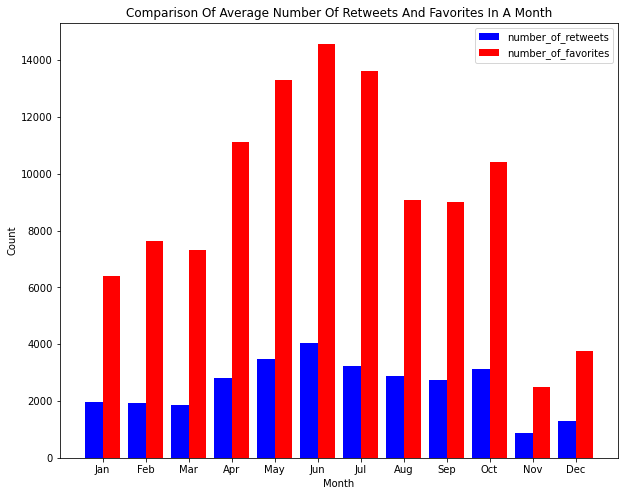

In [338]:
# two bar graphs settled in one
plt.figure(figsize = (10, 8))
retweet_bars = plt.bar(index, avg_retweets, width, alpha = 1, color = 'b', label = 'number_of_retweets')
favorite_bars = plt.bar(index+width, avg_favorites, width, alpha = 1, color = 'r', label = 'number_of_favorites')

# title and labels
plt.title('Comparison Of Average Number Of Retweets And Favorites In A Month')
plt.xlabel('Month')
plt.ylabel('Count')
locations = index + (width/2)
x_axis_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(locations, x_axis_labels)

# Legend
plt.legend();

##### Observations:

1. As we can see that on an average, number of favorites are quite higher than number of retweets.
2. July has the highest average number of favorites and November has the lowest average number of favorites.
3. May has the highest average number of retweets and November has the lowest average number of retweets.
4. June has the second highest both average number of favorites and retweets.

#### 2. Distribution of Source

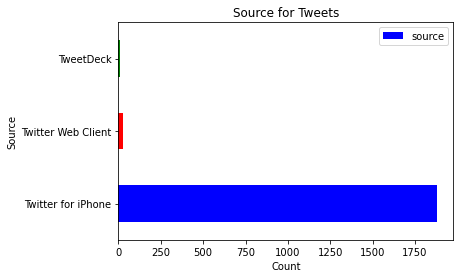

In [353]:
# Plot Distribution of Source 
archive_master.source.value_counts().plot(kind = 'barh', color = ['b', 'r', 'g'])
plt.title('Source for Tweets')
plt.xlabel('Count')
plt.ylabel('Source')
plt.legend();

In [346]:
# find the actual count
archive_master.source.value_counts()

Twitter for iPhone    1882
Twitter Web Client      26
TweetDeck               10
Name: source, dtype: int64

Most of the tweets over 90% of them are sent via iPhone, next by Web and very few by TweetDeck

##### Tweets creation over time

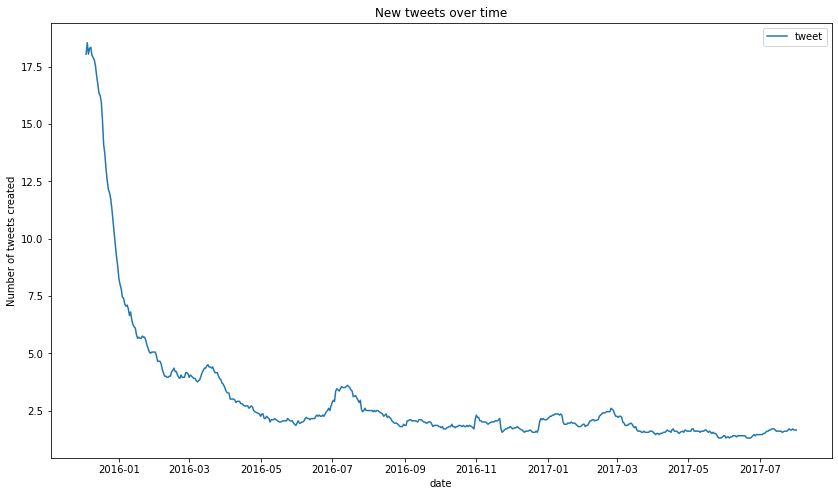

In [360]:
# Create two columns: 'date' to agregate 'datetime' 
# and 'tweet' to sum a number of tweets for a certain date
# by day
archive_master['date'] = archive_master['timestamp'].dt.date
# by week
#df_arch_clean['date'] = df_arch_clean['timestamp'].dt.week
# by month
#df_arch_clean['date'] = df_arch_clean['timestamp'].dt.month
archive_master['tweet'] = 1

# Create a new dataframe with 2 columns, gruped by date
df1 = archive_master[['date', 'tweet']].groupby(['date']).sum() # alternatively .count() could be used

# Use moving averages to smooth the line
df1['tweet'] = df1['tweet'].rolling(window=20).mean()

# Plot
df1.plot(figsize=(14, 8), title='New tweets over time')
plt.ylabel('Number of tweets created')
plt.show()

In [362]:
df1['tweet'].describe()

count    563.000000
mean       3.080728
std        2.995760
min        1.300000
25%        1.700000
50%        2.050000
75%        2.975000
max       18.550000
Name: tweet, dtype: float64

There were even more than 18 tweets on average created per day at the beginning of 2016 but this frequency quickly collapsed into about 3 on average in 2016 to be even lower in 2017. There is a clear trend of decreasing popularity in terms of creation of new tweets.


#### Retweets and favorities counts comparing to new tweets creation

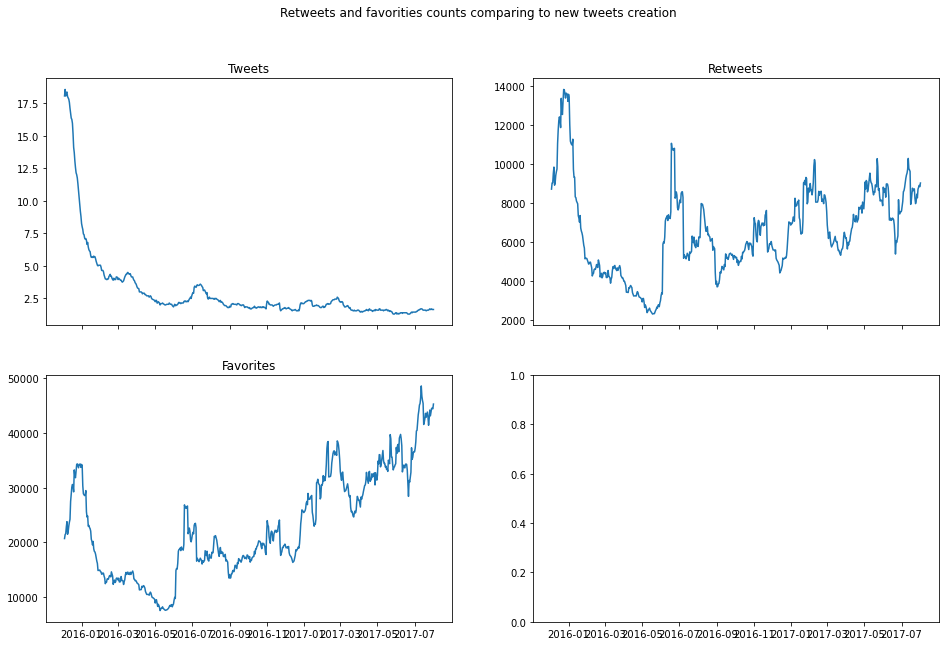

In [361]:
# Add rewteets and favorites to the picture
df = archive_master[['date', 'retweet_count', 'favorite_count']]

# Retweets
df2 = df[['date', 'retweet_count']].groupby(['date']).sum()
df2['retweet_count'] = df2['retweet_count'].rolling(window=20).mean()
#df2.plot(figsize=(16, 10))
#plt.show()

# Favorites
df3 = df[['date', 'favorite_count']].groupby(['date']).sum()
df3['favorite_count'] = df3['favorite_count'].rolling(window=20).mean()
#df3.plot(figsize=(16, 10))
#plt.show()
# Everything in a common grid
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(16,10))
fig.suptitle('Retweets and favorities counts comparing to new tweets creation')
axs[0, 0].plot(df1)
axs[0, 0].set_title('Tweets')
#axs[0, 0].set_yscale('log')
axs[0, 1].plot(df2)
axs[0, 1].set_title('Retweets')
#axs[0, 1].set_yscale('log')
axs[1, 0].plot(df3)
axs[1, 0].set_title('Favorites')
#axs[1, 0].set_yscale('log')
plt.show()

- Tweets -> after initial boom, the amount of tweets created daily stabilizes on around 2.5 per day on average.
- Retweets -> there is noticable variation of retweets but on average long-term they tend to stay on the same level.
- Favorites -> after initial boom and then colapse, the trend is growing. It seems people still use historical tweets and marke them as favotes or the user base is growing which results in more and more favorites.

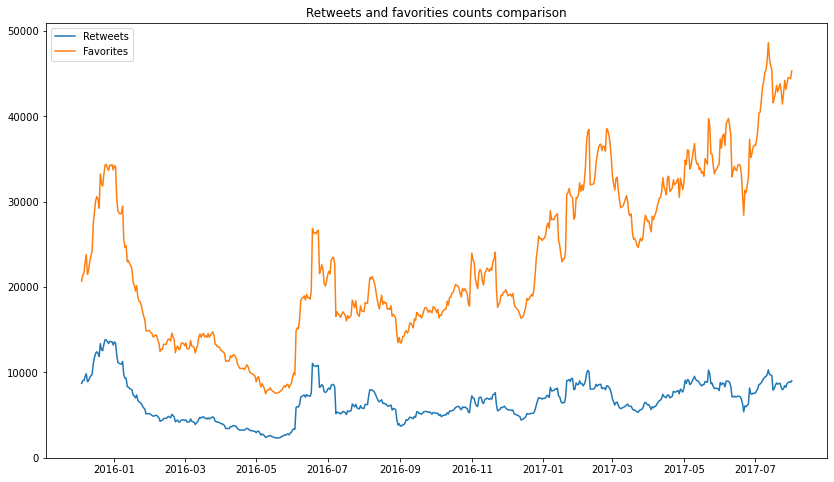

In [363]:
# Compare trends on a log scale for y axis
fig, axs = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(14,8))

axs.set_title('Retweets and favorities counts comparison')
#axs.set_yscale('log')
axs.plot(df2, label='Retweets')
axs.plot(df3, label='Favorites')
axs.legend()

plt.show()

The number of retweets tends to stay at the same level whereas number of favorites grows over time.